# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5) --> normal y desv estándar
* Ye = 6 + 2.1 * X  + e --> Estimación
* e estará distribuida según una N(0, 0.8) --> una normal de media 0 y desv estándar 0.8

In [2]:
import pandas as pd
import numpy as np

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)
err = 0 + 0.8 * np.random.randn(100)
y_pred = 6 + 2.1 * x
y_act = 6 + 2.1 * x + err

In [4]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [5]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list 
    }
)

In [6]:
data.head()

,x,y_actual,y_prediccion
0,4.121927,13.993177,14.656048
1,0.752462,7.410253,7.580170
2,4.712576,16.490541,15.896410
3,2.377708,12.319555,10.993186
4,1.789648,9.991010,9.758261


In [7]:
import matplotlib.pyplot as plt

In [8]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

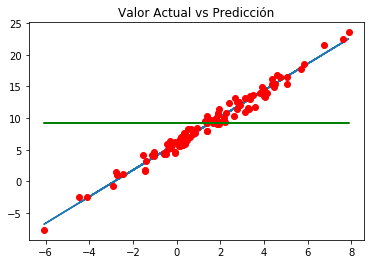

In [9]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [10]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_act))**2

In [11]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,4.121927,13.993177,14.656048,30.250471,0.439397,23.398236
1,0.752462,7.410253,7.580170,2.483257,0.028872,3.047651
2,4.712576,16.490541,15.896410,45.433057,0.352992,53.795420
3,2.377708,12.319555,10.993186,3.375235,1.759255,10.008051
4,1.789648,9.991010,9.758261,0.362712,0.054172,0.697233


In [12]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [13]:
print(SSR)
print(SSD)
print(SST)

2808.928188604653
64.65873281422297
2871.058869763523


In [14]:
SSR+SSD

2873.586921418876

In [15]:
R2 = SSR/SST
R2

0.9783596631148188

(array([ 9.,  7., 11., 15., 14., 14.,  9.,  9.,  9.,  3.]),
 array([-1.53493541, -1.21303093, -0.89112645, -0.56922197, -0.24731749,
         0.07458699,  0.39649147,  0.71839595,  1.04030043,  1.36220491,
         1.68410939]),
 <a list of 10 Patch objects>)

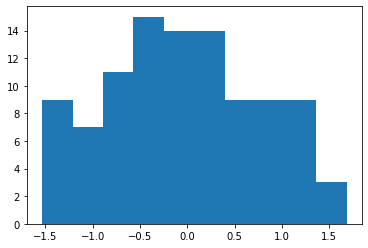

In [16]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión
* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [17]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4914280394799007, 9.156004826928896)

In [18]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean) #numerador
data["beta_d"] = (data["x"]-x_mean)**2 #denominador

In [19]:
beta = sum(data["beta_n"])/sum(data["beta_d"])
alpha = y_mean - beta * x_mean
alpha, beta

(6.025351123477657, 2.0990980594296587)

EL modelo lineal obtenido por regresión es: y = 5.890940843769907 + 2.1433649293733104 * x

In [20]:
data["y_model"] = alpha + beta + data["x"]
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,4.121927,13.993177,14.656048,30.250471,0.439397,23.398236,12.724179,6.919527,12.246377
1,0.752462,7.410253,7.580170,2.483257,0.028872,3.047651,1.290052,0.546071,8.876911
2,4.712576,16.490541,15.896410,45.433057,0.352992,53.795420,23.625626,10.375794,12.837025
3,2.377708,12.319555,10.993186,3.375235,1.759255,10.008051,2.803790,0.785492,10.502157
4,1.789648,9.991010,9.758261,0.362712,0.054172,0.697233,0.249015,0.088935,9.914097


In [21]:
y_m = np.mean(y_act)
SSR = sum((data["y_model"]-y_m)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_m)**2)
SSR, SSD, SST

(658.0803617995317, 855.1733622516487, 2871.058869763523)

In [22]:
R2 = SSR/SST
R2

0.22921172697992606

Text(0.5, 1.0, 'Valor Actual vs Predicción')

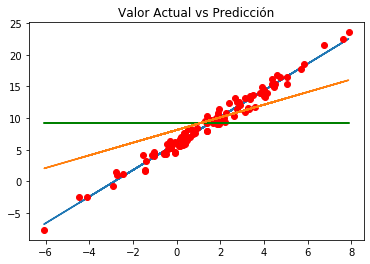

In [23]:
%matplotlib inline
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [24]:
RSE = np.sqrt(SSD/len(data)-2)
RSE

2.559635447190964

In [25]:
np.mean(data["y_actual"])

9.156004826928896

In [26]:
RSE / np.mean(data["y_actual"])

0.27955811465528857